## Providing Data driven suggestions for HR

**Objective:** To improve employee retention, use HR data to develop a model that predicts employee turnover. This model will pinpoint the main factors driving employees to leave, enabling the company to implement strategies to enhance retention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.duplicated().sum(),df.shape

(3008, (14999, 10))

In [9]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Observation:**  With several continuous variables across 10 columns, it seems very unlikely that the duplicate observations are legitimate. We can keep one and drop remaining.

In [10]:
df = df.drop_duplicates(keep='first')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
num_cols = df.describe().columns
num_cols 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [12]:
cat_cols  = df.describe(include='object').columns
cat_cols

Index(['department', 'salary'], dtype='object')

### Visualizations of distributinos of features against target variable

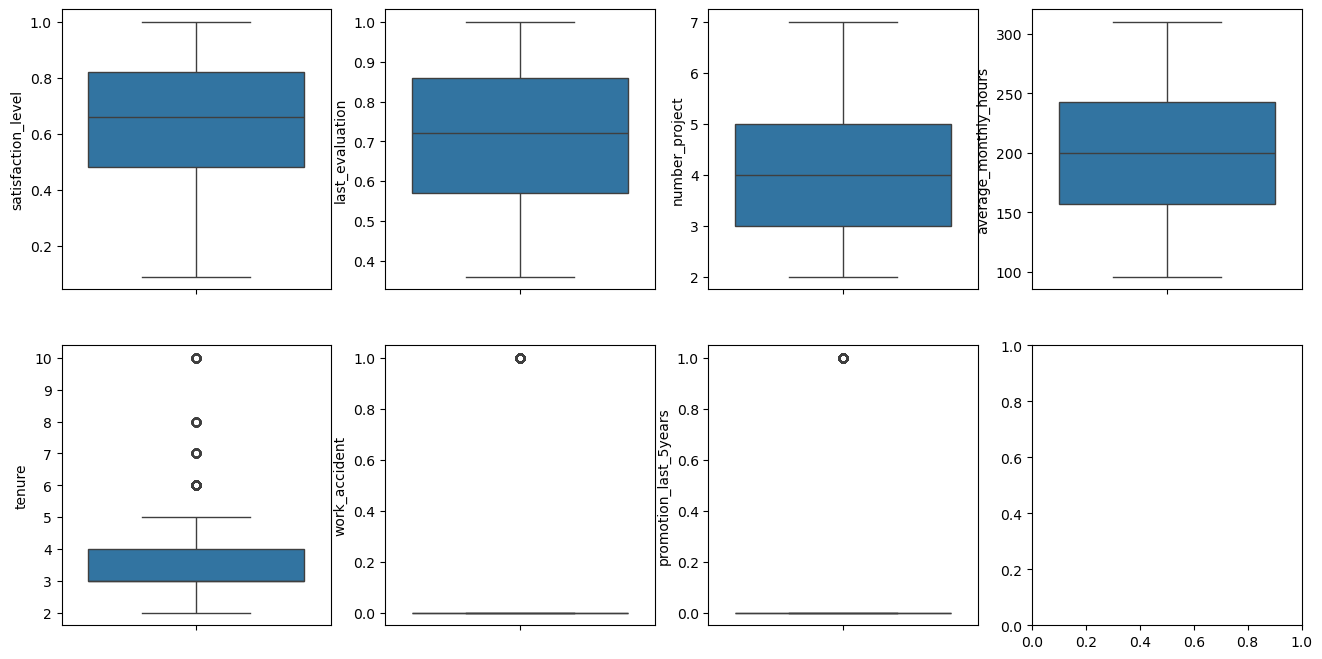

In [12]:
## target variable is 'left'
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years']
fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8))
i=0
for col in num_cols:
    sns.boxplot(df[col],ax=ax[i//4][i%4])
    i = i+1

#### Bivariate Analysis

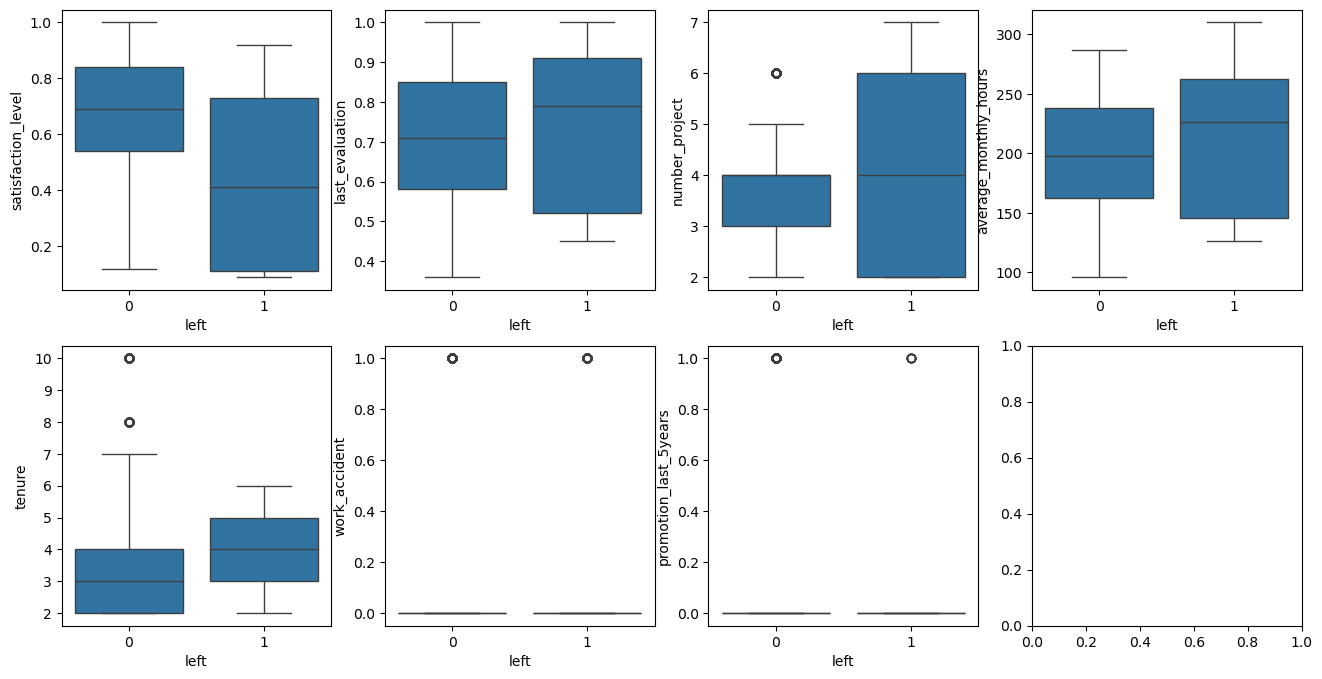

In [26]:
## target variable is 'left'
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years']
fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8))
i=0
for col in num_cols:
    sns.boxplot(y=df[col],x=df['left'],ax=ax[i//4][i%4])
    i = i+1

**Observations:**

There can be two ways the employee might leave the company. either by getting fired or resigning.

1. Tenure column seems to have outliers(long term employees) which can be dealt with when building model.
2. There is a significant difference in the average satisfaction levels of employees who left(low) and stayed(high).
3. Employees who left have broader range of last_evaluation value. This suggests that some employees who left actually performed better than who stayed while some of them got least evaluation score which may be got them fired.
4. There are 2 categories of employees who left, one who in less no.of projects(2) and one who worked in more number of projects(>4). while the people who stayed either were part of 3 or 4 projects(which seems to be optimal condition) should investigate more into this.
5. Same as above there are 2 categories of employees who left, some of employees who left have greater average monthly hours than who stayed while some of them have less average_monthly_hours than the one who stayed which may got them fired.

In [13]:
cat_cols

Index(['department', 'salary'], dtype='object')

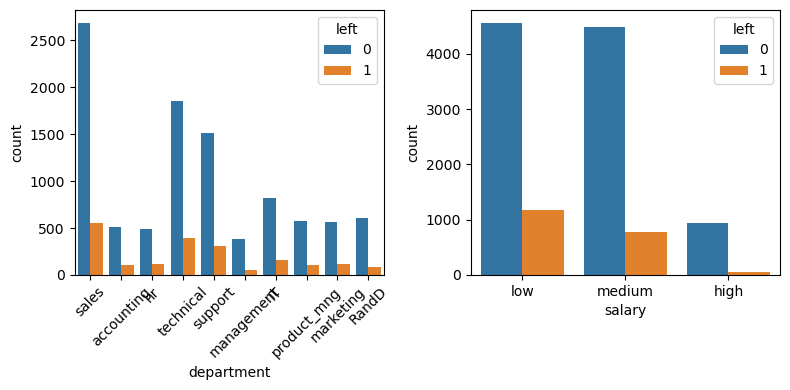

In [14]:
# Assuming df is your original DataFrame
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))

sns.countplot(data=df, x='department', hue='left',ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
sns.countplot(data=df, x='salary', hue='left',ax=ax[1])
plt.tight_layout()

**Observations:** 
1. Among the employee who left, high proportion of them had low salaries
2. There is no significant difference in the proportion of employee left and stayed across different departments

#### Multivariate Analysis 


<Axes: >

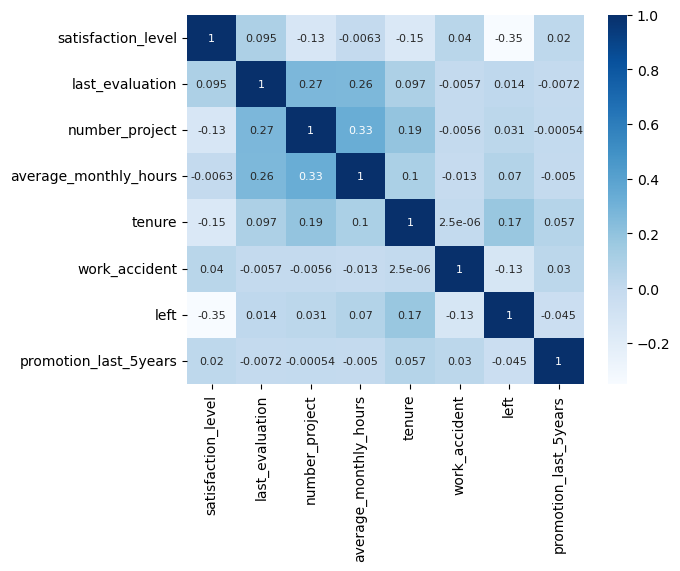

In [15]:
sns.heatmap(df[num_cols].corr(),annot=True,annot_kws={'size':8},cmap='Blues')

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

In [34]:
# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Unstack the correlation matrix to a Series
corr_series = corr_matrix.unstack()

# Remove duplicate pairs and self-correlations
# This step is optional depending on whether you want to keep the diagonal values (correlation of a column with itself)
corr_series = corr_series[corr_series < 1]  # Remove self-correlations
corr_series = corr_series.drop_duplicates()  # Remove duplicate pairs

# Sort the correlation values in descending order
sorted_corr = corr_series.sort_values(ascending=False)

corr = sorted_corr[abs(sorted_corr)>0.1]
corr

number_project         average_monthly_hours    0.331516
last_evaluation        number_project           0.270256
                       average_monthly_hours    0.264678
number_project         tenure                   0.188837
average_monthly_hours  tenure                   0.102875
satisfaction_level     number_project          -0.133246
                       tenure                  -0.152915
dtype: float64

Let's explore above correlations

<Axes: xlabel='number_project', ylabel='count'>

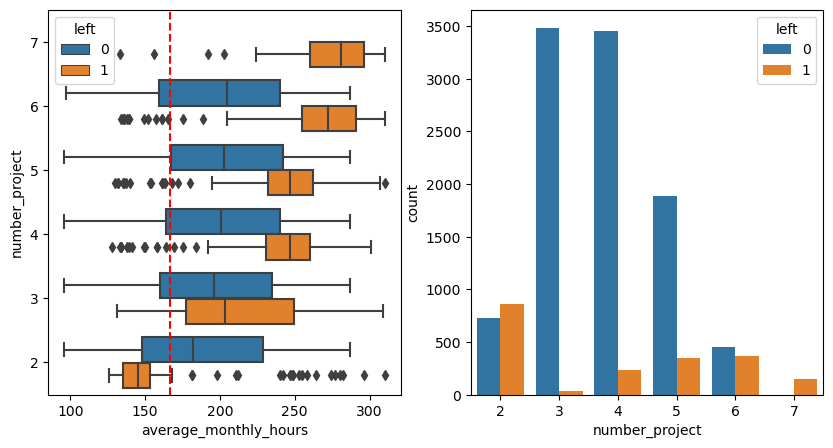

In [16]:
# number_project ,average_monthly_hours
# exploring boxplot alone can mislead us so lets plot barplot to get sample sizes of each of this groups
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(10,5))
project_order = sorted(df['number_project'].unique(),reverse=True)
sns.boxplot(y='number_project',x='average_monthly_hours',data=df,hue='left',orient='h',ax=ax[0],order=project_order)
ax[0].axvline(x=166.67, color='red', linestyle='--', label='166.67')
sns.countplot(x='number_project',hue='left',data=df,ax=ax[1])

**Observations:**
For a person who works 40 hours per week and 50 weeks per year, the average monthly hours is around 166.67hrs(normal value)
1. The average_monthly_hours increase as the number of projects increase - it is expected
3. All employees with 7 projects had around 265-290 average_monthly hours which is much higher than the normal value indicating the employees are overworked and burned out.
4. Among the employees with 6 projects the employees who left worked significantly higher hours than those who stayed, i.e they contributed more to the projects.
5. For employees with 4,5 projects the people who left have greater number of average_monthly_hours(but not as significant as above two cases which explains the low no.of.left to no.of.stayed ratio compared to 6 & 7 projects)compared to the people with same number if project who stayed. Those who left maybe because they contributed more to the projects.
6. For employees with 3 projects they seem to have around same average_monthly_hours which explains the fact that the left to stayed ratio is lowest here , seems that the optimal number of projects for an employee to contribute to seems to be 3-4.
7. For 2 projects it most probably seems that the people who had average_monthly hours less than all groups.
2. With these obseravtion we can say that there are two categories of people who left,
   1. **Those who worked more hours than the fellow employees with same number of projects contributed more to the project i.e, overworked.**
   2. **Those who worked less than the normal value of average_monthly hours and probably got fired.** 

<Axes: xlabel='number_project', ylabel='count'>

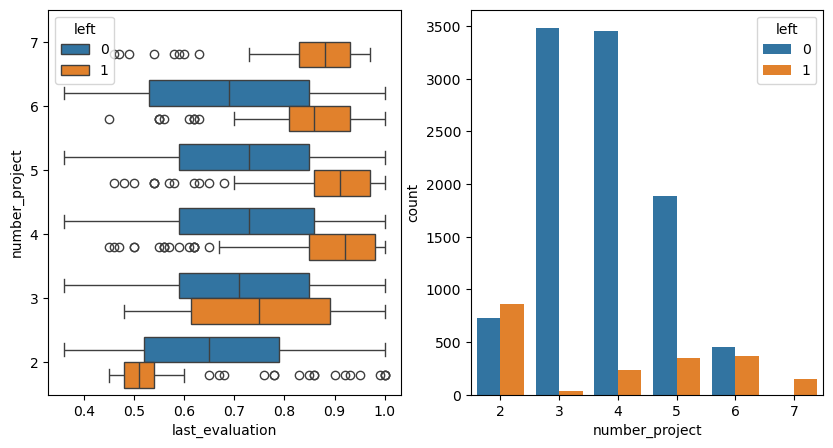

In [43]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(10,5))
project_order = sorted(df['number_project'].unique(),reverse=True)
sns.boxplot(y='number_project',x='last_evaluation',data=df,hue='left',orient='h',ax=ax[0],order=project_order)
sns.countplot(x='number_project',hue='left',data=df,ax=ax[1])

You can observe similar trends as that of with average_monthly_hours

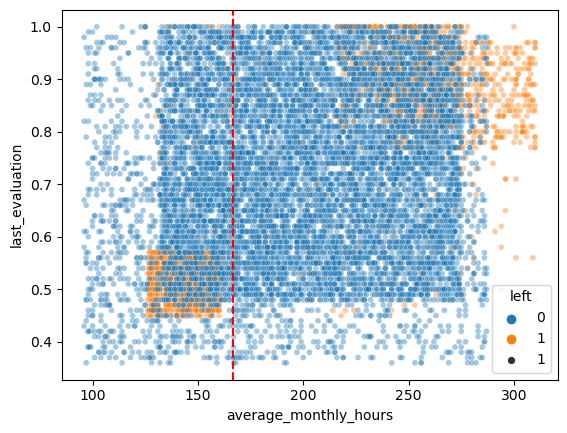

In [18]:
ax=sns.scatterplot(y = 'last_evaluation',x='average_monthly_hours',data=df,hue='left',alpha=0.4,size=1)
ax.axvline(x=166.67, color='red', linestyle='--', label='166.67')

**Observations:**
1. Among the employees we can see two groups who worked less hours(<166.67) and got low evaluation(got fired) and who worked more hours got good evaluation(left).
2. By seeing overall plot we can say that there is no guarantee that working more hours will lead to good evaluation score.
3. Those strange shapes in the plot indicates data manipulation or synthetic data.

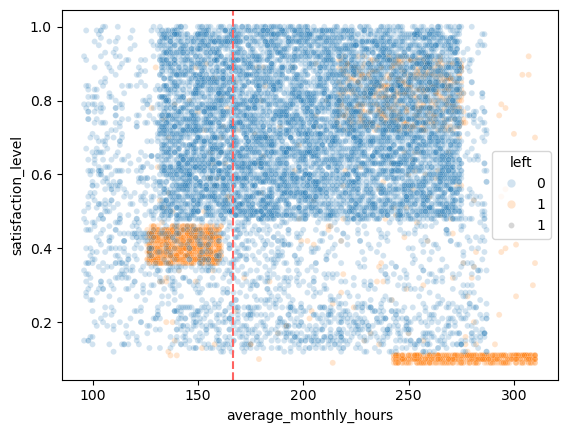

In [50]:
sns.scatterplot(y = 'satisfaction_level',x='average_monthly_hours',data=df,hue='left',alpha=0.2,size=1)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--') # indicating normal average monthly hours

1. The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

2. The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

3. Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

4. Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

<Axes: xlabel='number_project', ylabel='count'>

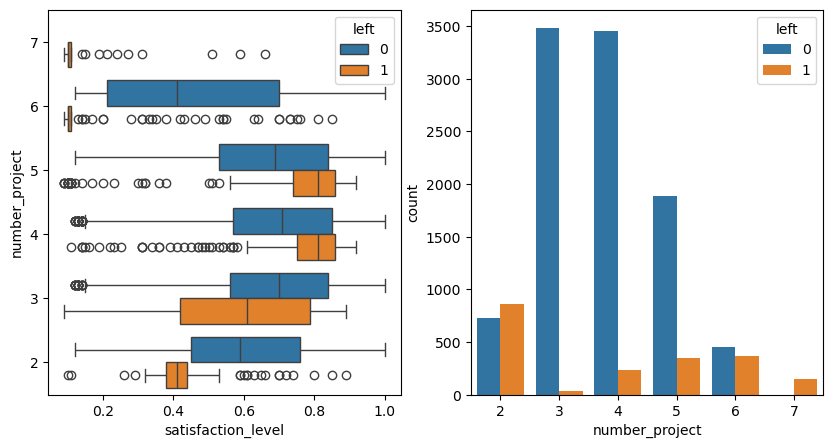

In [56]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(x = 'satisfaction_level',y='number_project',data=df,hue='left',orient='h',order=[7,6,5,4,3,2],ax=ax[0])
sns.countplot(x='number_project',hue='left',data=df,ax=ax[1])

1. The satisfaction levels of employees(who left) with 6,7 projects is significantly low, as we observed before this is cause they are overworked.
2. The satisfaction levels of employees(who left) with 2 projects is also low maybe they are intimidated of fellow employees whose average_monthly_hours and evaluation score is more.

<Axes: xlabel='tenure', ylabel='count'>

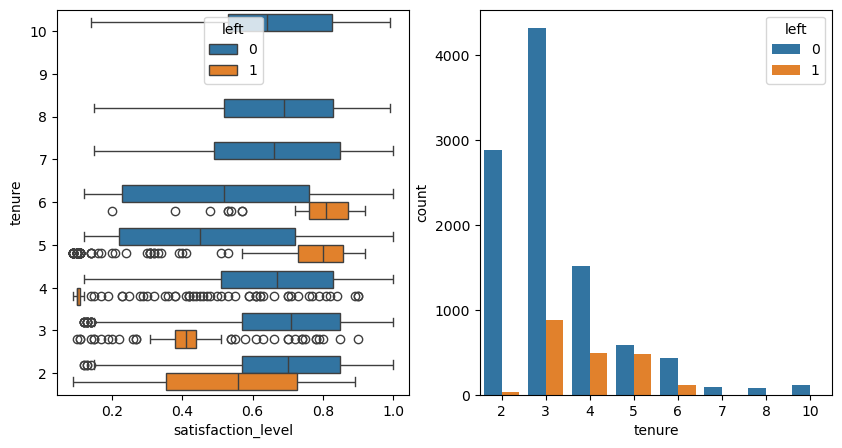

In [58]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(x = 'satisfaction_level',y='tenure',data=df,hue='left',orient='h',order=[10,9,8,7,6,5,4,3,2],ax=ax[0])
sns.countplot(x='tenure',hue='left',data=df,ax=ax[1])

1. the satisfaction level of employees with four years tenure is significantly ,worth to investigate if there are any policy changes at that time that might have affected people specifically at the four-year mark, if possible.
2. The satisfaction level of long term employees(7,8,10) is same as the new joiners and also you can see that there are only few of them which mean they are high salaried employees.
3. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

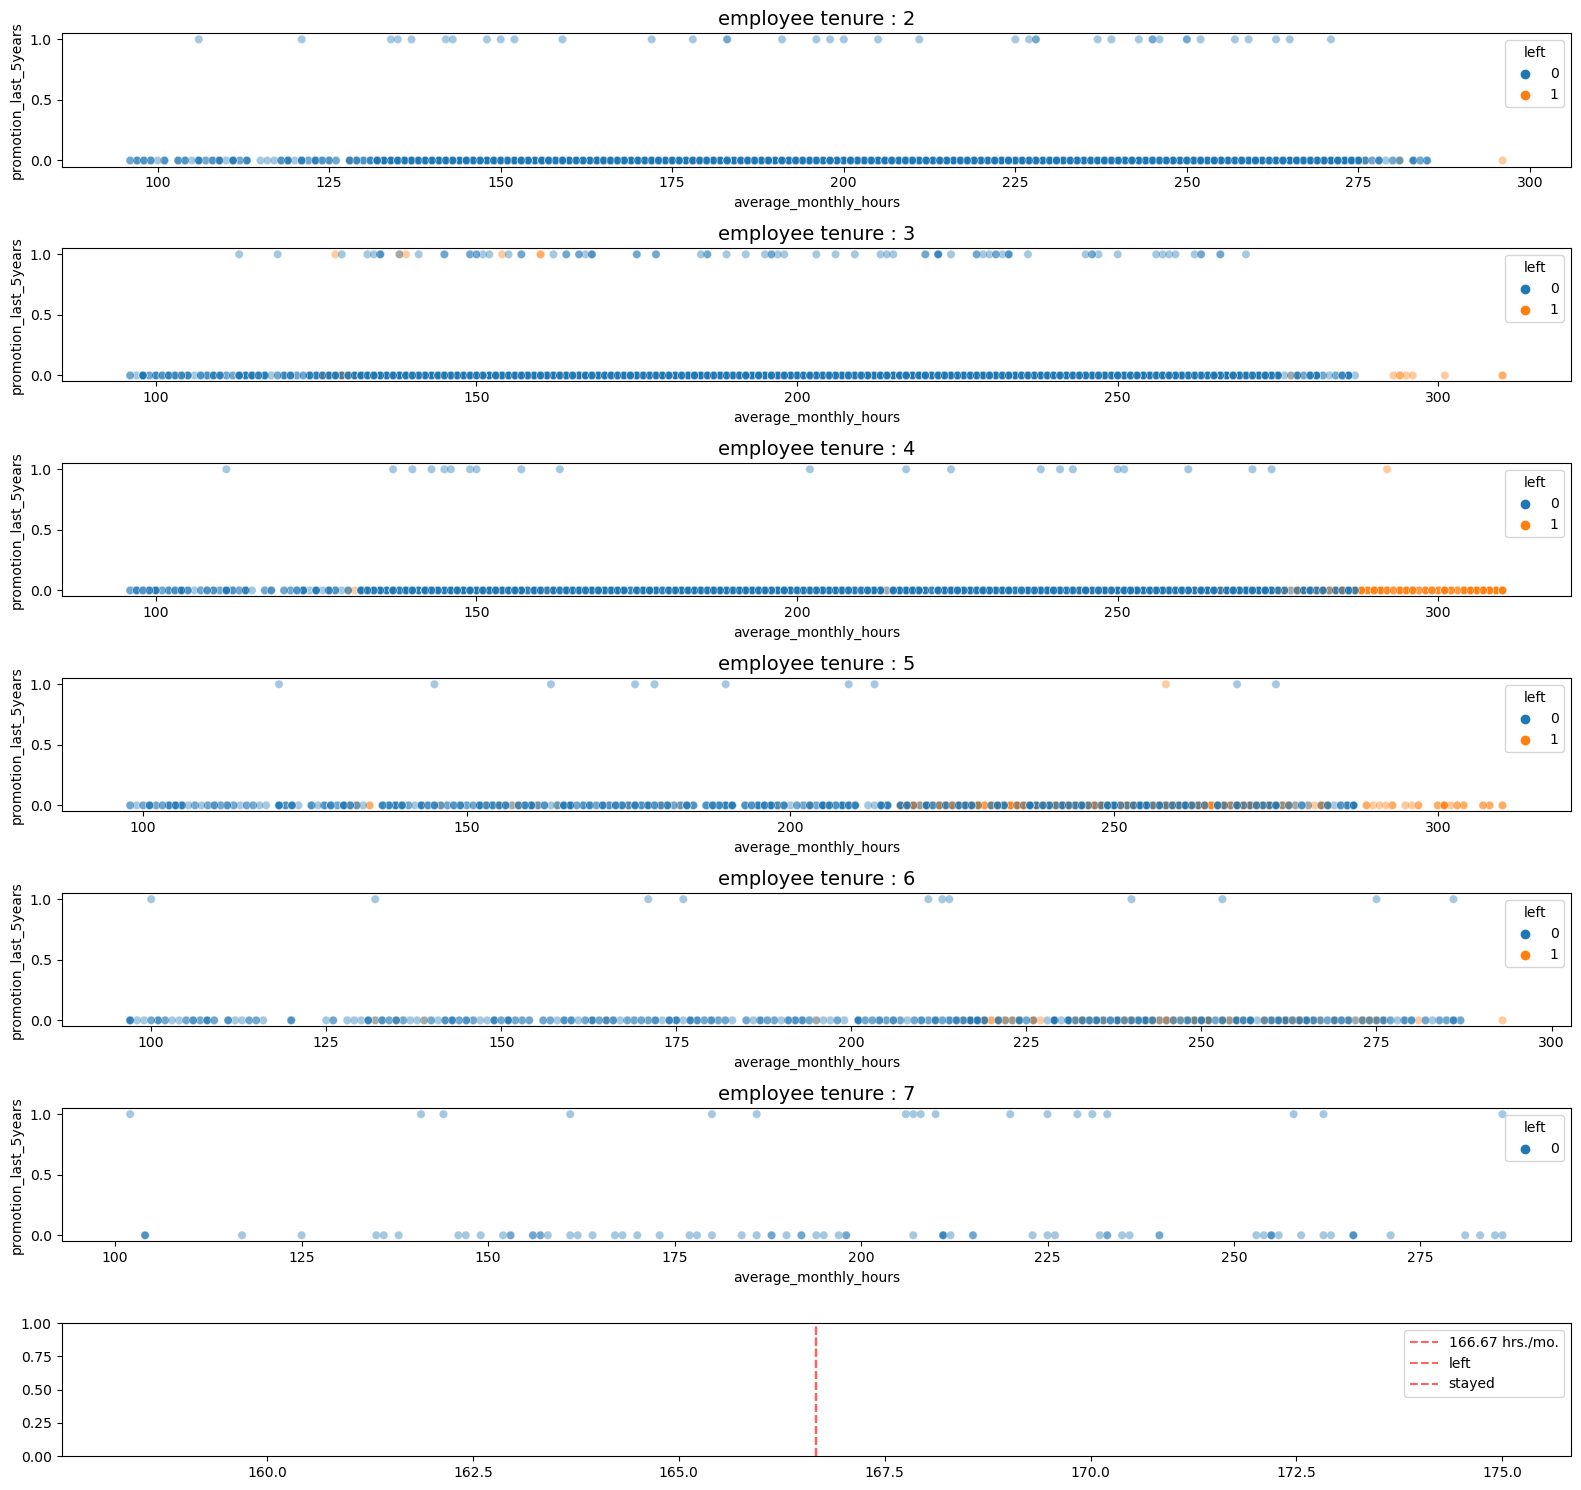

In [37]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`

fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(16,18))
for i in range(2,8):
    sns.scatterplot(data=df[df['tenure']==i], x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4,ax=ax[i-2])
    plt.axvline(x=166.67, color='#ff6361', ls='--')
    plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
    ax[i-2].set_title(f'employee tenure : {i}', fontsize='14')
plt.tight_layout()

We can see that significant no.of employee who left had a tenure of 4-5 years and were not promoted and worked longest hours.

**INSIGHTS** : Employees at the company are leaving primarily due to poor management, which is associated with longer working hours, a high number of projects, and lower satisfaction levels. Long hours without promotions or positive evaluations contribute to burnout. Conversely, employees who have been with the company for more than six years tend to remain.